In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl

from sklearn import linear_model
from sklearn.metrics import r2_score

%matplotlib inline

In [64]:
df = pd.read_csv('./FuelConsumption.csv')
print("The number of rows and columns in the given dataset is :- ", df.shape)
df.head()

The number of rows and columns in the given dataset is :-  (1067, 13)


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [65]:
print("Describing the dataset ")
df.describe()

Describing the dataset 


,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [66]:
# taking a part of the given dataset
df_part = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
df_part.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


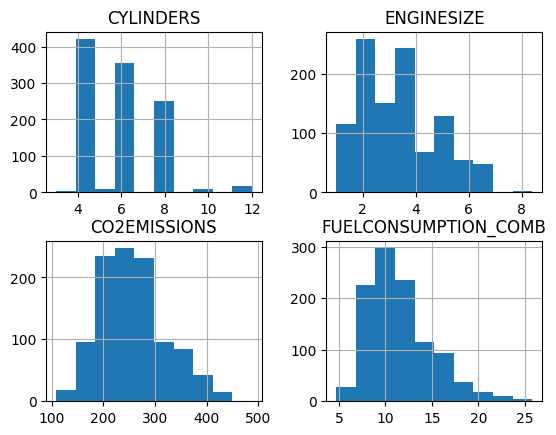

In [67]:
viz = df_part[['CYLINDERS', 'ENGINESIZE', 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

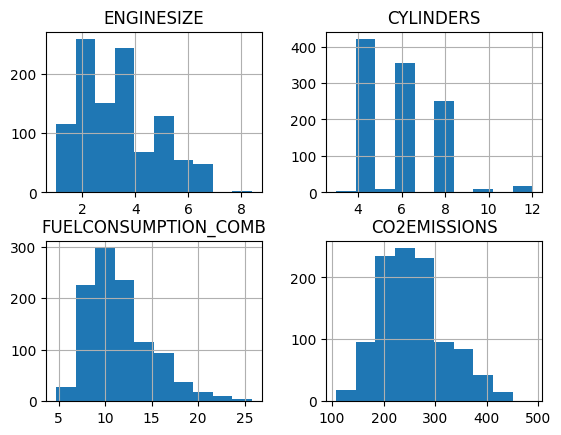

In [68]:
df_part.hist()
plt.show()

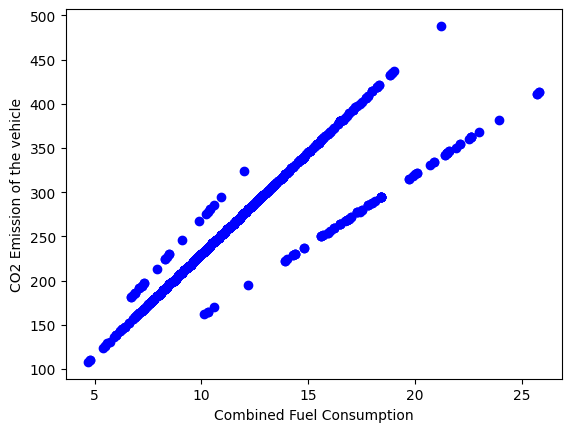

In [69]:
# Now plotting the scatter plot between the Fuel Consumption and Co2-Emission
plt.scatter(data=df_part, x='FUELCONSUMPTION_COMB', y='CO2EMISSIONS', color='blue')
plt.xlabel("Combined Fuel Consumption")
plt.ylabel("CO2 Emission of the vehicle")
plt.show()

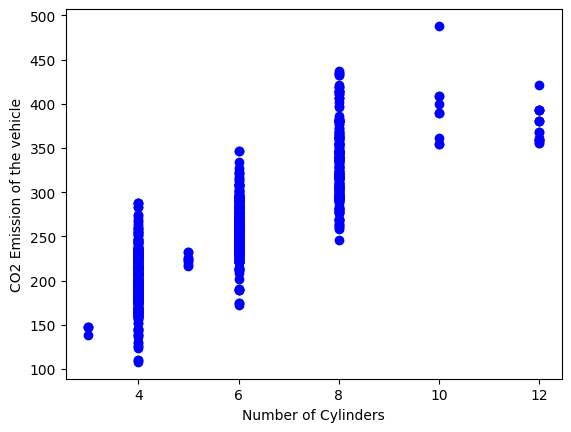

In [70]:
# Now plotting the Cyliner vs emission data
plt.scatter(data=df_part, x='CYLINDERS', y='CO2EMISSIONS', color='blue')
plt.xlabel("Number of Cylinders")
plt.ylabel("CO2 Emission of the vehicle")
plt.show()

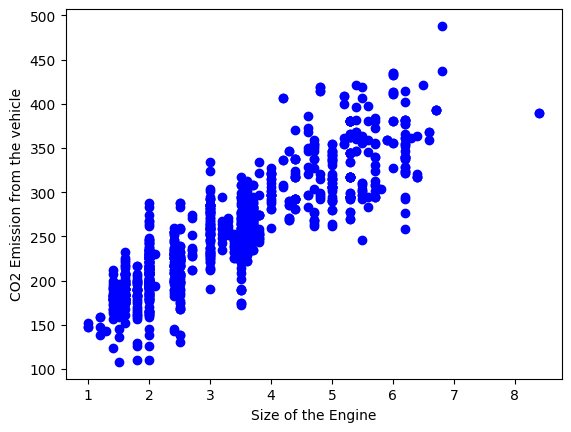

In [71]:
# Plotting the engine size vs cylinders plot
plt.scatter(data=df_part, x='ENGINESIZE', y='CO2EMISSIONS', color="blue")
plt.xlabel("Size of the Engine")
plt.ylabel("CO2 Emission from the vehicle")
plt.show()

In [72]:
# The length of the dataframe is the number of rows  
length_df = len(df)

In [73]:
msk = np.random.rand(length_df) < 0.8
train_set = df_part[msk]
test_set = df_part[~msk]

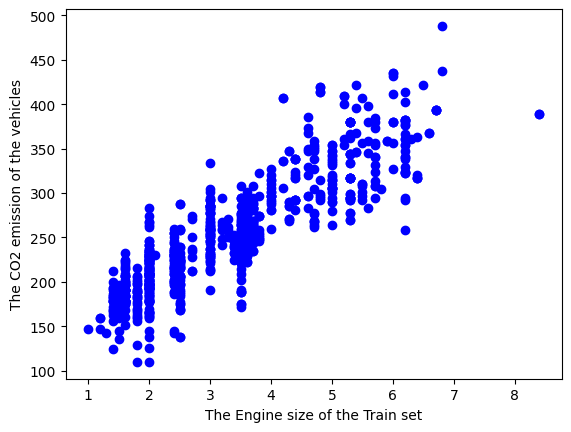

In [74]:
# To make a simple linear regression model
plt.scatter(data=train_set, x='ENGINESIZE', y='CO2EMISSIONS', color='blue')
plt.xlabel("The Engine size of the Train set")
plt.ylabel("The CO2 emission of the vehicles")
plt.show()

In [75]:
regression = linear_model.LinearRegression()
train_x = np.asanyarray(train_set[['ENGINESIZE']])
train_y = np.asanyarray(train_set[['CO2EMISSIONS']])
regression.fit(train_x, train_y)

# The formula obtained applying the regression model will be
print(f"{regression.coef_} * ENGINESIZE + {regression.intercept_} = CO2EMISSIONS")

[[39.11396911]] * ENGINESIZE + [125.00494941] = CO2EMISSIONS


In [76]:
regression.intercept_

array([125.00494941])

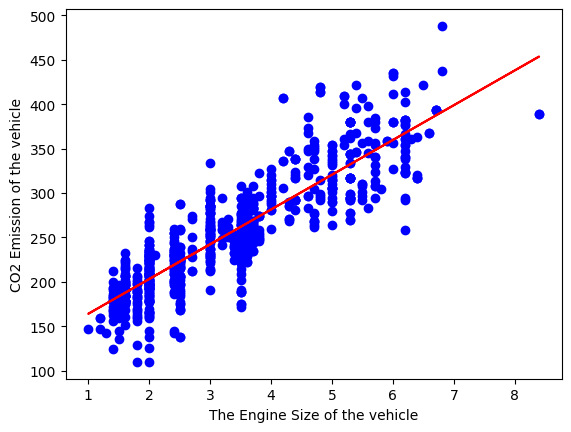

In [77]:
# Again plot the same plot as before but we will also add a regression line to it
plt.scatter(data=train_set, x='ENGINESIZE', y="CO2EMISSIONS", color='blue')
plt.plot(train_x, (regression.coef_[0][0]*train_x + regression.intercept_[0]), '-r')
plt.xlabel("The Engine Size of the vehicle")
plt.ylabel("CO2 Emission of the vehicle")
plt.show()

### Evaluation of the Model

In [79]:
test_x = np.asanyarray(test_set[['ENGINESIZE']])
test_y = np.asanyarray(test_set[['CO2EMISSIONS']])
test_prediction = regression.predict(test_x)

print("Mean absolute error %.2f" % np.mean(np.absolute(test_prediction - test_y)))
# Because Mean Abssolute error is Mean of | y - y(hat)|

print("Residual sum of squares (MSE): %.2f" % np.mean((test_prediction - test_y) ** 2))
# Because the MSE is the mean of the (y - yhat)^2

print("R2 score :- %.2f " % r2_score(test_y , test_prediction))

Mean absolute error 23.74
Residual sum of squares (MSE): 948.48
R2 score :- 0.77 


In [81]:
# Now trying to achieve the same thing by selecting the columns FUELCONSUMPTION_COMB
train_x1 = np.asanyarray(train_set[['FUELCONSUMPTION_COMB']])
test_x1 = np.asanyarray(test_set[['FUELCONSUMPTION_COMB']])

regression = linear_model.LinearRegression()
regression.fit(train_x1, train_y)

print(f"The equation for the given set would be :- {regression.coef_[0][0]} * FUELCONSUMPTION_COMB + {regression.intercept_[0]} = CO2EMISSIONS")

The equation for the given set would be :- 16.830106249803137 * FUELCONSUMPTION_COMB + 61.59960190170057 = CO2EMISSIONS


In [86]:
# To find the predictions 
predictions = regression.predict(test_x1)

In [87]:
# Finding the absolute mean 
print("Mean absolute error %.2f" % np.mean(np.absolute(predictions - test_y)))

Mean absolute error 21.16


### <center> Multiple Linear Regression </center>

In [88]:
# We first take the part of the dataset which we will be using for the multiple linear regression
df_part.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


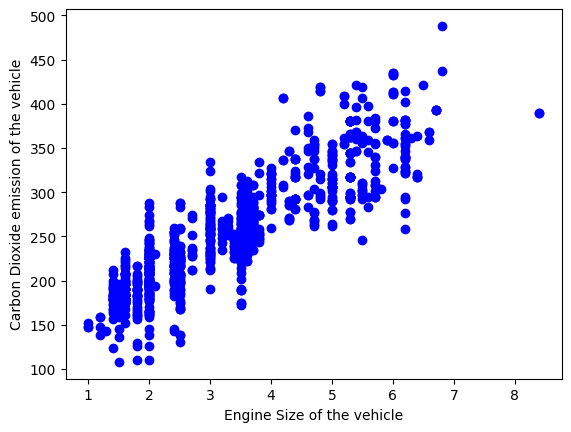

In [89]:
# Plotting the partitioned data in the form of a scatter plot
plt.scatter(data=df_part, x='ENGINESIZE', y='CO2EMISSIONS', color='blue')
plt.xlabel("Engine Size of the vehicle")
plt.ylabel("Carbon Dioxide emission of the vehicle")
plt.show()

In [90]:
msk = np.random.rand(len(df)) < 0.8
train = df_part[msk]
test = df_part[~msk]

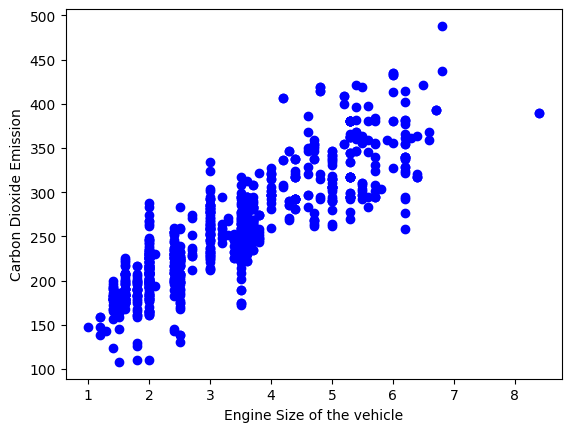

In [92]:
plt.scatter(data=train, x='ENGINESIZE', y='CO2EMISSIONS', color='blue')
plt.xlabel("Engine Size of the vehicle")
plt.ylabel("Carbon Dioxide Emission")
plt.show()

In [94]:
regression = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

regression.fit(train_x, train_y)
print("The intercept of the regression model is :- ", regression.intercept_)
print("The coefficients for the independent variables are :- ", regression.coef_)

The intercept of the regression model is :-  [62.75516177]
The coefficients for the independent variables are :-  [[10.35263326  7.50558906 10.00622862]]


In [97]:
# Predicting the dependent variable 
y_hat = regression.predict(test[["ENGINESIZE", 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
test_x = np.asanyarray(test[["ENGINESIZE", 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

# Finding the MSE
print("The mean squared error for the given dataset is %.2f" % np.mean((y_hat - test_y) ** 2))

# Finding the Variance score value
print("Variance Score  :- %.2f" % regression.score(test_x, test_y))

The mean squared error for the given dataset is 582.84
Variance Score  :- 0.86


c:\Python_3.10.2\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [98]:
df_trial = df[["ENGINESIZE", 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'CO2EMISSIONS']]
df_trial.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,CO2EMISSIONS
0,2.0,4,9.9,6.7,196
1,2.4,4,11.2,7.7,221
2,1.5,4,6.0,5.8,136
3,3.5,6,12.7,9.1,255
4,3.5,6,12.1,8.7,244


In [99]:
m = np.random.rand(len(df)) < 0.8
train_set = df_trial[m]
test_set = df_trial[~m]

In [103]:
regression = linear_model.LinearRegression()
train_set_x = np.asanyarray(train_set[["ENGINESIZE", 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
train_set_y = np.asanyarray(train_set[['CO2EMISSIONS']])

regression.fit(train_set_x, train_set_y)
print("Intercept of the new model :- ", regression.intercept_)
print("Coefficinets of the new model :- ", regression.coef_)


Intercept of the new model :-  [63.63264428]
Coefficinets of the new model :-  [[10.74153484  7.54780799  5.41043988  4.3734831 ]]


In [106]:
test_set_x = test_set[["ENGINESIZE", 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']]
yhat = regression.predict(test_set_x)
test_set_y = np.asanyarray(test_set[['CO2EMISSIONS']])

# MSE
print("The MSE of the given dataset will be :- %.2f" % np.mean((yhat - test_set_y) ** 2))

# Varince Score
print("The variance score is :- %.2f" % regression.score(test_set_x, test_set_y))

The MSE of the given dataset will be :- 625.60
The variance score is :- 0.83


c:\Python_3.10.2\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
c:\Python_3.10.2\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
